## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [17]:
#Imports
import matplotlib
import cv2
import math
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook
from scipy import linalg
from scipy.linalg import null_space
import imageio

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

# Taking Image and Defining the Axis

<IPython.core.display.Javascript object>


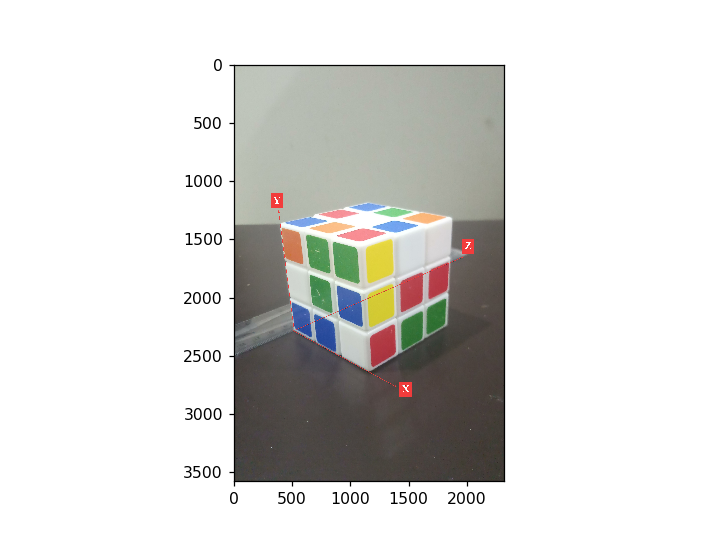

In [18]:
axis = np.array(mpimg.imread('axis.png'))
plt.imshow(axis)
plt.show()

# Defining Points Order

<IPython.core.display.Javascript object>


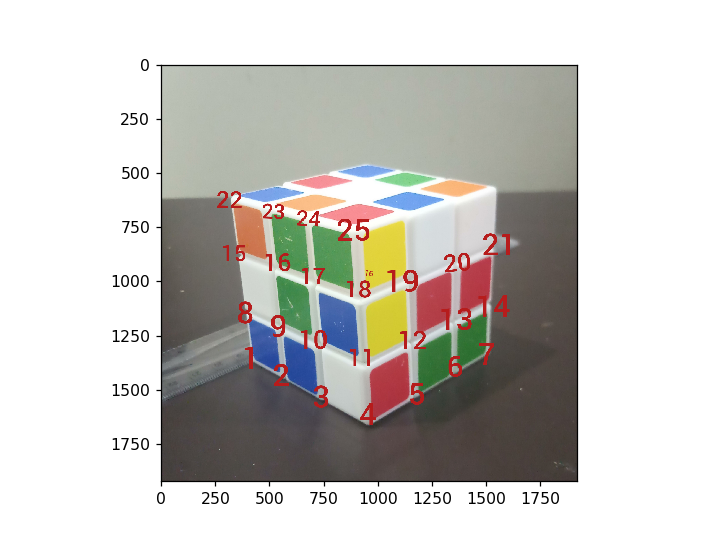

In [19]:
order = np.array(mpimg.imread('order.jpg'))
plt.imshow(order)
plt.show()

# Marking 20 Image Points

<IPython.core.display.Javascript object>


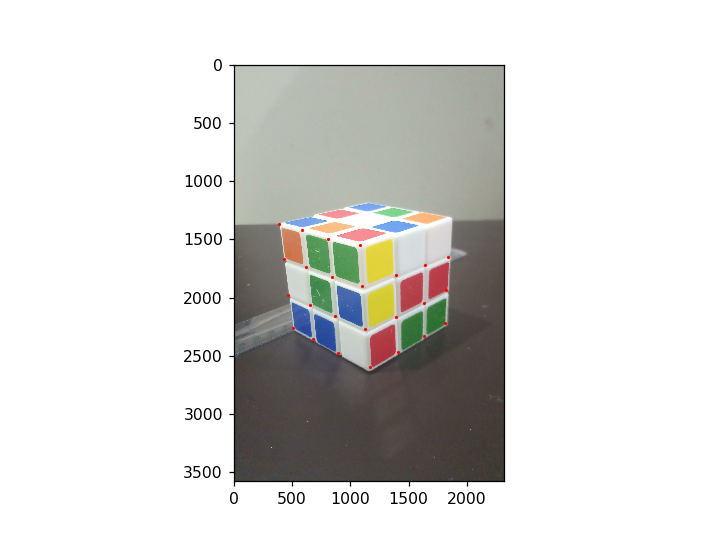

In [20]:
cube = np.array(mpimg.imread('cube.jpg')) # Reading Rubik's Cube image into memory

# The numbers (commented ones) represent the points in order as shown in above image

image_points = np.array([
                  [511, 2258, 1, 1], # 1
                  [676, 2354, 1, 1], # 2
                  [898, 2473, 1, 1], # 3
                  [1169, 2592, 1, 1], # 4          
                  [1411, 2466, 1, 1], # 5
                  [1636, 2330, 1, 1], # 6                 
                  [1816, 2221, 1, 1], # 7
    
                  [463, 1974, 1, 1], # 8               
                  [656, 2060, 1, 1], # 9
                  [872, 2161, 1, 1], # 10
                  [1130, 2269, 1, 1], # 11
                  [1391, 2170, 1, 1], # 12
                  [1633, 2043, 1, 1], # 13
                  [1826, 1935, 1, 1], # 14    
    
                  [434, 1670, 1, 1], # 15
                  [618, 1737, 1, 1], # 16                
                  [840, 1822, 1, 1], # 17
                  [1101, 1896, 1 , 1], # 18
                  [1391, 1806, 1 , 1], # 19 
                  [1642, 1719, 1 , 1], # 20                
                  [1836, 1651, 1 , 1], # 21   
    
                  [386, 1364, 1, 1], # 22 
                  [588, 1422, 1, 1], # 23 
                  [811, 1496, 1, 1], # 24
                  [1082, 1551, 1, 1] # 25  
                  ])

# Plotting and marking the image points on the cube
# 'ro' means red color and circle
# first argument = x coordinate
# second argument = y coordinate

plt.plot(image_points[0][0], image_points[0][1], 'ro', markersize=1)
plt.plot(image_points[1][0], image_points[1][1], 'ro', markersize=1)
plt.plot(image_points[2][0], image_points[2][1], 'ro', markersize=1)
plt.plot(image_points[3][0], image_points[3][1], 'ro', markersize=1)
plt.plot(image_points[4][0], image_points[4][1], 'ro', markersize=1)
plt.plot(image_points[5][0], image_points[5][1], 'ro', markersize=1)
plt.plot(image_points[6][0], image_points[6][1], 'ro', markersize=1)
plt.plot(image_points[7][0], image_points[7][1], 'ro', markersize=1)
plt.plot(image_points[8][0], image_points[8][1], 'ro', markersize=1)
plt.plot(image_points[9][0], image_points[9][1], 'ro', markersize=1)
plt.plot(image_points[10][0], image_points[10][1], 'ro', markersize=1)
plt.plot(image_points[11][0], image_points[11][1], 'ro', markersize=1)
plt.plot(image_points[12][0], image_points[12][1], 'ro', markersize=1)
plt.plot(image_points[13][0], image_points[13][1], 'ro', markersize=1)
plt.plot(image_points[14][0], image_points[14][1], 'ro', markersize=1)
plt.plot(image_points[15][0], image_points[15][1], 'ro', markersize=1)
plt.plot(image_points[16][0], image_points[16][1], 'ro', markersize=1)
plt.plot(image_points[17][0], image_points[17][1], 'ro', markersize=1)
plt.plot(image_points[18][0], image_points[18][1], 'ro', markersize=1)
plt.plot(image_points[19][0], image_points[19][1], 'ro', markersize=1)
plt.plot(image_points[20][0], image_points[20][1], 'ro', markersize=1)
plt.plot(image_points[21][0], image_points[21][1], 'ro', markersize=1)
plt.plot(image_points[22][0], image_points[22][1], 'ro', markersize=1)
plt.plot(image_points[23][0], image_points[23][1], 'ro', markersize=1)
plt.plot(image_points[24][0], image_points[24][1], 'ro', markersize=1)

plt.imshow(cube)
plt.show()

# Establishing World Coordinates in Millimeters

In [21]:
# These are in the same order as image points defined above and according to the axis defined

world_points = np.array([
                     [0, 0, 0], # 1
                     [1, 0, 0], # 2
                     [2, 0, 0], # 3
                     [3, 0, 0], # 4
                     [3, 0, 1], # 5
                     [3, 0, 2], # 6
                     [3, 0, 3], # 7
    
                     [0, 1, 0], # 8
                     [1, 1, 0], # 9
                     [2, 1, 0], # 10
                     [3, 1, 0], # 11
                     [3, 1, 1], # 12
                     [3, 1, 2], # 13
                     [3, 1, 3], # 14
    
                     [0, 2, 0], # 15
                     [1, 2, 0], # 16
                     [2, 2, 0], # 17
                     [3, 2, 0], # 18
                     [3, 2, 1], # 19
                     [3, 2, 2], # 20
                     [3, 2, 3], # 21
    
                     [0, 3, 0], # 22
                     [1, 3, 0], # 23
                     [2, 3, 0], # 24
                     [3, 3, 0] # 25
                    ])

cube_height = 67 # in millimeters
one_box_side = 28 # in millimeters

# Therefore, we have to scale each world coordinate by 22 millimeters (took help from slides lec 11)

scaled_world_points = world_points * one_box_side

# Now converting these to homogenous coordinates since world points are of the form :
'''
X
Y
Z
1

'''

ones = np.ones((25, 1)) # 25 rows and 1 columns filled with 1

# Appending ones to end of scaled world points arrqy
# E.g [0, 2, 0] will now become [0, 2, 0, 1]

# axis=1 means appending along y-axis (column)
scaled_world_points = np.append(scaled_world_points, ones, axis=1)

# Computing Camera Matrix P

In [22]:
# Setting up Matrix A as mentioned in slides
# Lecture 11, Slide number 20

rows = 25 # of both image and scaled real world points
matrixA = []
for i in range (rows):
    # Following 3 are the real (scaled) world points
    scaled_x = scaled_world_points[i][0]
    scaled_y = scaled_world_points[i][1]
    scaled_z = scaled_world_points[i][2]
    # x coordinate of image multiplied by real (scaled) world points coordinates
    imageX_scaledx = -image_points[i][0] * scaled_x
    imageX_scaledy = -image_points[i][0] * scaled_y
    imageX_scaledz = -image_points[i][0] * scaled_z
    # negative of x xoordinate of image point
    negImageX = -image_points[i][0]
    
    # y coordinate of image multiplied by real (scaled) world points coordinates
    imageY_scaledx = -image_points[i][1] * scaled_x
    imageY_scaledy = -image_points[i][1] * scaled_y
    imageY_scaledz = -image_points[i][1] * scaled_z
    # negative of y xoordinate of image point
    negImageY = -image_points[i][1]
    
    # Two rows created using above information
    # [X, Y, Z, 1, 0, 0, 0, 0, x*X, x*Y, x*Z, -x]
    # [0, 0, 0, 0, X, Y, Z, 1, y*X, y*Y, y*Z, -y]
    # X, Y, Z are real world points
    # x, y, z are image points (pixels)
    part1 = [scaled_x, scaled_y, scaled_z, 1, 0, 0, 0, 0, imageX_scaledx, imageX_scaledy, imageX_scaledz, negImageX]
    part2 = [0, 0, 0, 0, scaled_x, scaled_y, scaled_z, 1, imageY_scaledx, imageY_scaledy, imageY_scaledz, negImageY]

    # Adding these 2 rows to our matrix A
    matrixA.append(part1)
    matrixA.append(part2)
    
    # Now loop will execute 25 times and in the end we will have matrix A compiled
    # Shape of matrix A : (50, 12)
    # We have been given 25 correspondences
    # Each will yield 2 equations
    # Then we would be able to solve for the unknowns
    
# Since we created and dealed with arrays above, hence converting matrixA to array as well
matrixA = np.array(matrixA)

# Now calculting Null-Space of matrixA
null_space_matrixA = np.linalg.svd(matrixA)

# SVD will give us output in the following form : U * S * (V transpose)
# We need column of V corresponding to the singular value of zero
# That is the right most column (smallest eigen value)

V = null_space_matrixA[2] # 0 is U, 1 is S, 2 is V transpose
column_with_singular_value_of_zero = V[-1] # end most (right most) column

# Now reshaping into a 3x4 matrix to finally get Camera Matrix P
matrixP = column_with_singular_value_of_zero.reshape(3, 4)

print('Camera Matrix P :  ', matrixP)

Camera Matrix P :   [[ 2.23903946e-03 -7.53724985e-04  4.58334116e-03  2.17150872e-01]
 [-7.01463054e-04 -5.14923555e-03  5.12762853e-04  9.76110369e-01]
 [-9.73233576e-07 -4.37383824e-07  9.55486014e-07  4.33851228e-04]]


# Average Re-Projection Error

In [23]:
# Multiplying camera matrix P with scaled world points to calclute back-projected camera points
# Transposing world points because camera matrix is 3x4
# Hence we need world points 4x25. They were originally of shape 25x4
back_projected = matrixP.dot(scaled_world_points.transpose()) # 3x25 matrix as output

# Normalizing the output
columns = back_projected.shape[1] # 25 columns
for i in range(columns):
    # 2nd index contains the 'h' values
    # Hence, dividing zeroth index (x) and first index (y) by it for all values in output points
    back_projected[0][i] = back_projected[0][i] / back_projected[2][i]
    back_projected[1][i] = back_projected[1][i] / back_projected[2][i]
    
    # So that last index becomes 1 for all
    back_projected[2][i] = back_projected[2][i] / back_projected[2][i]
    
# Now calculating error
image_points = image_points.transpose() # We need 4x25 since back-projected has shape (3, 25)
# Subtracting x values of camera backprojecting and original image points marked
# Same for y values as well
error_x = back_projected[0] - image_points[0]
error_y = back_projected[1] - image_points[1]

# Euclidien Distances
error_squared = np.square(error_x + error_y)
error = np.sum(error_squared)
error = np.sqrt(error)

# Averaging
error = error / 25 # Error per pixel 
    
print('Average Re-Projection Error is : ', error)

Average Re-Projection Error is :  2.3148317111291328


# Original points and the back-projected camera points on a single image

<IPython.core.display.Javascript object>


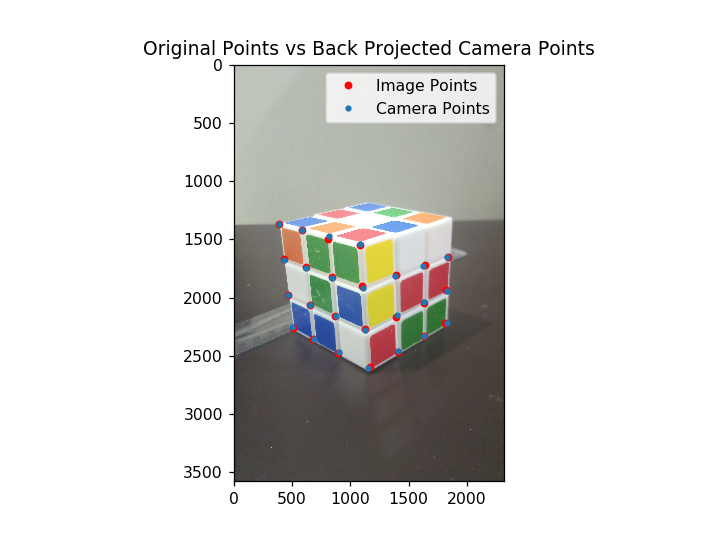

In [24]:
cube2 = np.array(mpimg.imread('cube.jpg'))

original_points = plt.plot(image_points[0], image_points[1], 'ro', label='Image Points', markersize=4)
camera_points = plt.plot(back_projected[0], back_projected[1], 'o', label='Camera Points', markersize=3)

plt.title('Original Points vs Back Projected Camera Points')
plt.legend()
plt.imshow(cube2)
plt.show()

## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [25]:
def QR_Decomposition(matrix): 
    return np.linalg.qr(matrix)

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

In [26]:
# C is the null vector of the camera matrix P calculated above
# Now calculting Null-Space of matrixP
null_space_matrixP = np.linalg.svd(matrixP)

# SVD will give us output in the following form : U * S * (V transpose)
# We need column of V corresponding to the singular value of zero
# That is the right most column (smallest eigen value)

V2 = null_space_matrixP[2] # 0 is U, 1 is S, 2 is V transpose
column_with_singular_value_of_zero2 = V2[-1] # end most (right most) column

# Now reshaping into a 4x1 matrix to finally get Camera Center C
C = column_with_singular_value_of_zero2.reshape(4, 1)

# We need it in the form x y z 1 hence dividing x y z by third index
C = C / C[3]
print('Camera Center : ', C)
print('')

# NOW FINDING INTRINSIC CAMERA PERIMETERS
# Using RQ decomposition
# Since we don't have this function we will utilize QR decomposition
# QR decomposition decomposes a matrix into an orthonormal matrix times upper triangular matrix 

#  ----  WORKING ----
'''
Let A = KR (3x3 sub-matrix of P)
We perform QR decomposition on A-inverse
=> qr(A-inverse) = QL where Q = orthogonal and L = upper-triangular
This gives : A = KR = L-inverse Q-inverse = L-inverse Q-transpose
Hence : K = L-inverse and R = Q-transpose or Q-inverse
Source : https://simonl02.users.greyc.fr/files/Documents/Teaching/VisionLabs/lab6.pdf

'''

# First 3x3 of matrix P is KR
# First argument = rows
# Second argument = columns
# 0:3 means 0, 1, and 2 rows and same for columns
# K is upper-triangular and R is orthonormal
KR = matrixP[0:3, 0:3]
KR_inverse = np.linalg.inv(KR)

# Apply QR decomposition
# Q = orthogonal and L = upper-triangular
Q, L = QR_Decomposition(KR_inverse)

K = np.linalg.inv(L)
K = K / K[2, 2] # Normalizing

R = np.linalg.inv(Q)

print('Intrinsic Matrix K : ', K)
print('')
print('Rotation Matrix R : ', R)

Camera Center :  [[ 242.13076998]
 [ 142.41482816]
 [-142.24330748]
 [   1.        ]]

Intrinsic Matrix K :  [[-3.38167007e+03  6.57397932e+01  1.23321910e+03]
 [ 0.00000000e+00  3.24126077e+03  1.66946856e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Rotation Matrix R :  [[-0.70620642  0.02574725 -0.70753769]
 [ 0.198888   -0.9518841  -0.23315279]
 [-0.67949692 -0.30537475  0.66710584]]


<IPython.core.display.Javascript object>


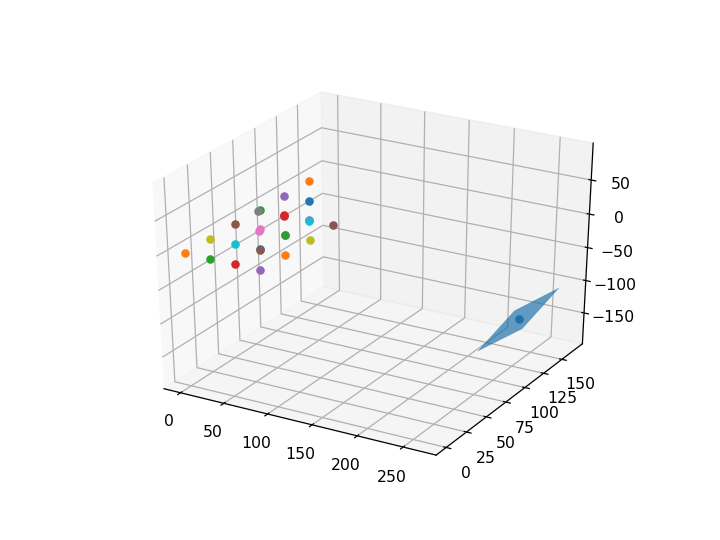

In [27]:
# Plotting
orientation = matrixP[2]
orientation = orientation / orientation[-1]
a, b, c, d = orientation
xx, yy = np.meshgrid(range(50), range(50))
xx = xx + C[0] - 25
yy = yy + C[1] - 25
n = np.array([a, b, c])
z = (-a * xx - b * yy -d) * 1. /c
ax = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, z)

ax.scatter3D(C[0], C[1], C[2])

for i in range (len(scaled_world_points)):
    ax.scatter3D(scaled_world_points[i][0], scaled_world_points[i][1], scaled_world_points[i][2])

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

In [28]:
# Looked up sensor size from 'DevCheck' app that is available on google playstore

# Sensor Size
w = 4.55 # width
h = 3.38 # height

# Image Size is 2322 x 3572  (horizontal axis by vertical axis)
# Sensor Size is 4.55mm x 3.38mm
# Reference from Lecture 11 Slide 39
mx = 3572 / h
my = 2322 / w

mx = round(mx, 2) # mx = 992.2222222222222 hence rounding to 2 decimal places

print('mx = ', mx, ' pix/mm')
print('my = ', my, ' pix/mm')

# Reference from Lecture 11 , Slide 11 to find f
x_part = abs(K[0, 0])
y_part = abs(K[1, 1])

fx = x_part / mx
fy = y_part / my

print('f = [', fx, ', ', fy, '] mm')

# Looked up actual focal length from 'DevCheck' app that is available on google playstore
print('Actual Focal Length = 3.71mm') 
print('')

# Principal Point of Camera
# It is the last column of matrix K (Lecture 11, Slide 38)
x = K[0, 2]
y = K[1, 2]
z = K[2, 2]

principal_point = np.array([
    [x, y, z]
])

principal_point = np.transpose(principal_point) # Because it was in form [x, y, z]

print('Principal Point of Camera :  ', principal_point)

mx =  1056.8  pix/mm
my =  510.32967032967036  pix/mm
f = [ 3.199914906713548 ,  6.351307713637508 ] mm
Actual Focal Length = 3.71mm

Principal Point of Camera :   [[1.23321910e+03]
 [1.66946856e+03]
 [1.00000000e+00]]


<IPython.core.display.Javascript object>


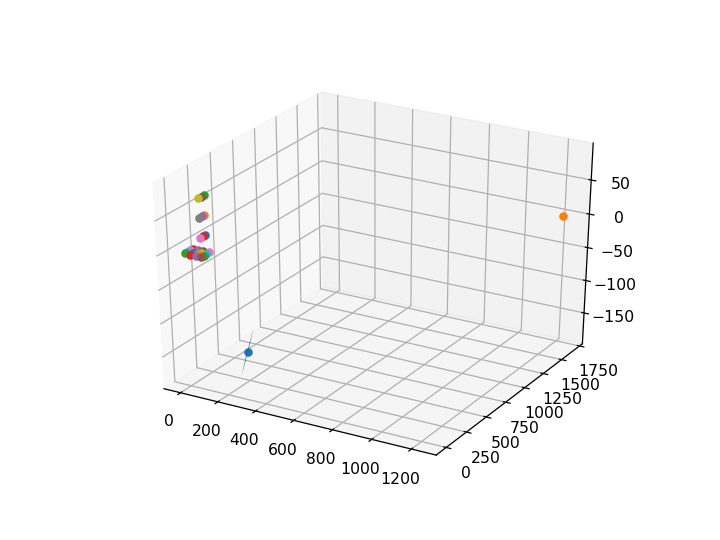

In [29]:
# Plotting
orientation = matrixP[2]
orientation = orientation / orientation[-1]
a, b, c, d = orientation
xx, yy = np.meshgrid(range(50), range(50))
xx = xx + C[0] - 25
yy = yy + C[1] - 25
n = np.array([a, b, c])
z = (-a * xx - b * yy -d) * 1. /c
ax = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, z)

ax.scatter3D(C[0], C[1], C[2])

ax.scatter3D(principal_point[0], principal_point[1], principal_point[2])

for i in range (len(scaled_world_points)):
    ax.scatter3D(scaled_world_points[i][0], scaled_world_points[i][1], scaled_world_points[i][2])

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

1. Point/take more image points (for example greater than 20)
2. Take more images and from different angles
3. Use better lightening while capturing images
4. Take more precise measurements
5. We can also make use of neural networks to learn the matrix

-- Took 25 points instead of 20 and repeated the whole process and this time took photo in optimal 
lightening as well. There was not any noticiable change.

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

In [ ]:
# your answer goes here